In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')

In [3]:
ordinal = ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal.shape

(2580, 81)

In [5]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

In [6]:
y

array([126000, 139500, 124900, ..., 145000, 217500, 215000])

In [7]:
X.shape

(2580, 80)

In [8]:
GBM_R2 = []
GBM_AR2 = []
GBM_MAE = []

for i in range(100):

    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train, Y_train)
    
    pred = gbm.predict(X_test)
    
    GBM_Score = gbm.score(X_test, Y_test)
    GBM_R2.append(GBM_Score)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
    GBM_AR2.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    GBM_MAE.append(mae)

In [14]:
Results = pd.DataFrame({'GBM_R2_NLNS': GBM_R2, 'GBM_AR2_NLNS': GBM_AR2,'GBM MAE NLNS':GBM_MAE})
#Results

In [15]:
Results.describe()

,GBM_R2_NLNS,GBM_AR2_NLNS,GBM MAE NLNS
count,100.000000,100.000000,100.000000
mean,0.894370,0.879387,13978.240945
std,0.035211,0.040206,668.085407
min,0.808477,0.781310,12518.716902
25%,0.859647,0.839738,13573.631382
50%,0.909888,0.897107,13892.752936
75%,0.924204,0.913453,14416.186188
max,0.937956,0.929155,15927.352975


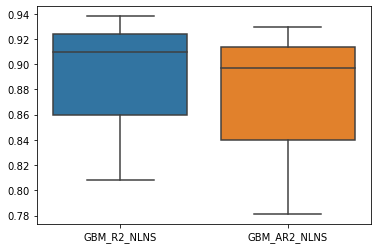

In [17]:
sns.boxplot(data=Results[['GBM_R2_NLNS', 'GBM_AR2_NLNS']]);

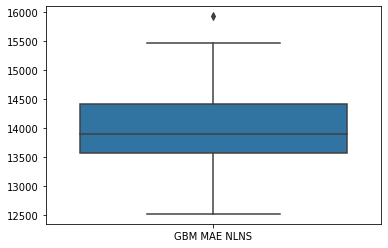

In [18]:
sns.boxplot(data=Results[['GBM MAE NLNS']]);

In [19]:
Results.to_csv('Results1.csv', index=False)